# **Measure DUT and Apply Cal**

### Import modules

In [ ]:
import skrf as rf
from skrf.vi.vna import PNA
import matplotlib.pyplot as plt
import calibration_functions as cf
from datetime import date
import time

rf.stylely()

### Initialize VNA

In [8]:
f_start = 5E9
f_stop = 15E9
f_npoints = int(801)

vna = PNA(address ='TCPIP0::10.236.73.132::inst0::INSTR')
time.sleep(3)
vna.reset()
vna.scpi.set_trigger_manual

meas_channel = 2

meas_S11 = 'S11'
vna.create_meas(meas_S11,'S11', channel = meas_channel) 
meas_S22 = 'S22'
vna.create_meas(meas_S22,'S22', channel = meas_channel) 
meas_S21 = 'S21'
vna.create_meas(meas_S21,'S21', channel = meas_channel) 
meas_S12 = 'S12'
vna.create_meas(meas_S12,'S12', channel = meas_channel) 

vna.set_frequency_sweep(f_start, 
                        f_stop, 
                        f_npoints, 
                        f_unit = 'Hz',
                        channel = meas_channel, 
                        )

### Take measurement

In [9]:
vna.sweep

measurement_S11 = vna.get_measurement(mname = meas_S11)
measurement_S22 = vna.get_measurement(mname = meas_S22)
measurement_S21 = vna.get_measurement(mname = meas_S21)
measurement_S12 = vna.get_measurement(mname = meas_S12)

measurement = rf.two_port_reflect(measurement_S11, measurement_S22)
measurement.s[:,0,1] = measurement_S12.s[:,0,0]
measurement.s[:,1,0] = measurement_S21.s[:,0,0]

### Create and apply cal

In [10]:
cal_folder = 'C:/Users/lab/Documents/Aaron/DARPA/Data/Aaron_Quick_Turn_Antenna/Test_Board_21-10-07/2021-10-07_SOLT/'
# cal_folder = 'C:/Users/lab/Documents/Aaron/DARPA/Data/Aaron_Quick_Turn_Antenna/Test_Board_21-10-07/2021-10-07_TRL_2/'

cal = cf.make_SOLT_cal(cal_folder)
# cal = cf.make_TRL_cal(cal_folder)

measurement_corrected = cal.apply_cal(measurement)

c:\users\lab\documents\code\scikit-rf\skrf\calibration\calibration.py:1454: UserWarning: n_thrus is None, guessing which stds are transmissive
  warn('n_thrus is None, guessing which stds are transmissive')


### Plot

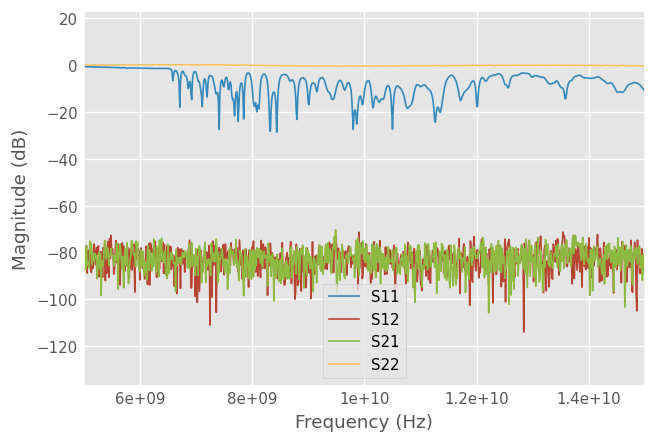

In [6]:
measurement.plot_s_db()
measurement_corrected.plot_s_db()

### Save measurement

In [45]:
data_folder = 'C:/Users/lab/Documents/Aaron/DARPA/Data/Aaron_Quick_Turn_Antenna/Test_Board_21-10-07/'

today = date.today()
date_str = today.strftime("%Y-%m-%d")

measurement_name = 'Board_Feed'

rf.write(data_folder + measurement_name + '_' + date_str + '.ntwk', measurement)
rf.write(data_folder + measurement_name + '_' + date_str + '_calibrated' + '.ntwk', measurement_corrected)